In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

adding panda

In [22]:
df = pd.read_csv(r'C:\Users\James\TripleTen-1\vehicles_us.csv')


loading csv file

In [23]:
df.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

In [24]:
df.shape

(51525, 13)

In [25]:
df.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [26]:
df.describe()

price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [27]:
df.isnull().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

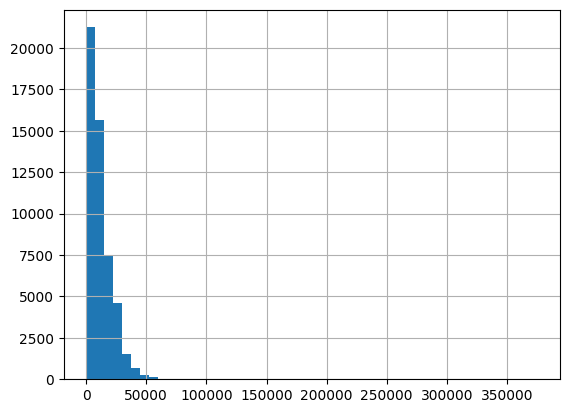

In [28]:
df['price'].hist(bins=50)
plt.show()

Distribution of Numberical Data

In [29]:
df['model'].value_counts()

model
ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: count, Length: 100, dtype: int64

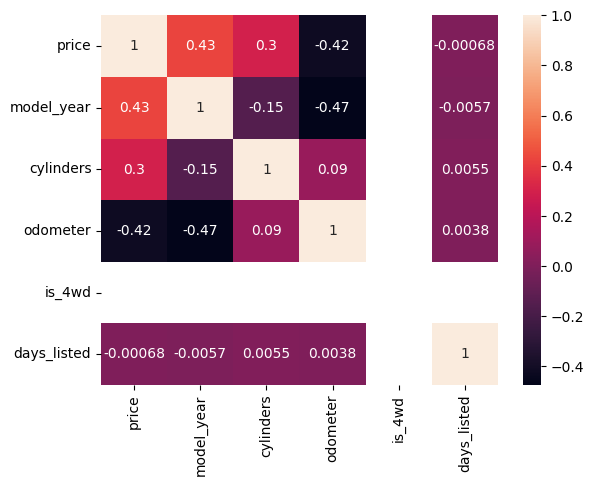

In [30]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Correlation on Numeric Column Only

In [31]:
fig = px.histogram(df, x='price', nbins=50, title='Price Distribution')
fig.show()

fig = px.histogram(df, x='odometer', nbins=50, title='Odometer Distribution')
fig.show()

Histogram for price and odometer

In [32]:
fig = px.scatter(df, x='model_year', y='price', title='Price vs. Model Year')
fig.show()

fig = px.scatter(df, x='odometer', y='price', title='Price vs. Odometer')
fig.show()

Scatterplots using price against model_year and or odometer

In [33]:
# Average price by car condition
avg_price_condition = df.groupby('condition')['price'].mean().reset_index()
fig = px.bar(avg_price_condition, x='condition', y='price', title='Average Price by Car Condition')
fig.show()

# Average price based on cylinders and fuel type
avg_price_cylinders_fuel = df.groupby(['cylinders', 'fuel'])['price'].mean().reset_index()
fig = px.bar(avg_price_cylinders_fuel, x='cylinders', y='price', color='fuel', barmode='group', title='Average Price by Cylinders and Fuel Type')
fig.show()


More insight for average price"condition" of car against fuel type.